#**Linear Regression Assignment**
##**Problem Statement:**
A bike-sharing system allows users to rent bikes for short-term use, either for free or for a fee. These systems use computer-controlled docks where users can unlock a bike by entering payment information and return it to any dock within the network.

BoomBikes, a U.S.-based bike-sharing provider, has experienced significant revenue losses due to the COVID-19 pandemic. Facing challenges in sustaining operations, the company is developing a strategic plan to recover and increase revenue once lockdown restrictions are lifted.

To prepare for the post-quarantine period, BoomBikes aims to understand the demand for shared bikes. Their objective is to meet consumer needs more effectively, stand out from competitors, and achieve sustainable profitability.

To achieve this, BoomBikes has engaged a consulting firm to analyze the factors driving bike demand in the American market. The analysis focuses on identifying key variables that influence demand and assessing their significance. The consulting firm has compiled a comprehensive dataset based on daily bike usage patterns, meteorological data, and consumer behavior.

##**Objective of the company:**
The company seeks to analyze the demand for shared bicycles in the post-quarantine period. This initiative aims to align their offerings with consumer preferences, differentiate their services from competitors, and improve overall profitability.  

To achieve this, the provided dataset includes three key variables: **‘casual’**, representing the number of unregistered users renting bikes; **‘registered’**, indicating the count of registered users making bookings; and **‘cnt’**, the total number of bike rentals, encompassing both casual and registered users. The model should use **‘cnt’** as the target variable to predict overall bike demand effectively.  

Once the model is constructed and residual analysis is complete, its performance must be evaluated using the R-squared metric. Predictions on the test dataset can be compared to actual values with the following code snippet:  

**from sklearn.metrics import r2_score**

**r2_score(y_test, y_pred)**  


Here, **`y_test`** represents the actual target variable values in the test dataset, and **`y_pred`** contains the corresponding predicted values. This step is vital as the R-squared score indicates the model’s ability to explain variance in the target variable. Ensuring the variable names in the function match those used in the code is essential. By following these guidelines, the company can gain actionable insights into bike demand trends and refine their strategic approach.

## Step 1: Importing warnings and libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

###- **Reading the dataset to understand **

In [3]:
# Read the data from csv file

df = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


##**Getting a quick snapshot of the data structure, column names, and sample data**

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of dataframe
df.shape

(730, 16)

##**Computing summary statistics for the DataFrame.**

In [6]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## **Providing a concise summary of the DataFrame's structure while checking for any missing values.**

In [7]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##**Calculating the total count of missing (null) values for each column in the DataFrame.**

In [8]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


# Modifying column names to enhance clarity and improve readability.

In [9]:
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [10]:
# Check the head of the dataset

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Copying the dataframe into new

df_copy = df.copy()

In [12]:
# checking the shape of new dataframe

df_copy.shape

(730, 16)

In [13]:
# dropping the duplicates

df_copy.drop_duplicates(inplace=True)

In [14]:
# re-verifying the shape of new dataframe

df_copy.shape

(730, 16)

#### The unchanged shape after dropping duplicates indicates that the original DataFrame contains no duplicate entries.

In [15]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

##**Converting numerical season values into their corresponding names to enhance the readability and interpretability of the DataFrame.**

In [16]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [17]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [18]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [19]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [20]:
# check the head of the dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## **Verifying the data types of the columns in the dataset..**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## **Visualising the Data**

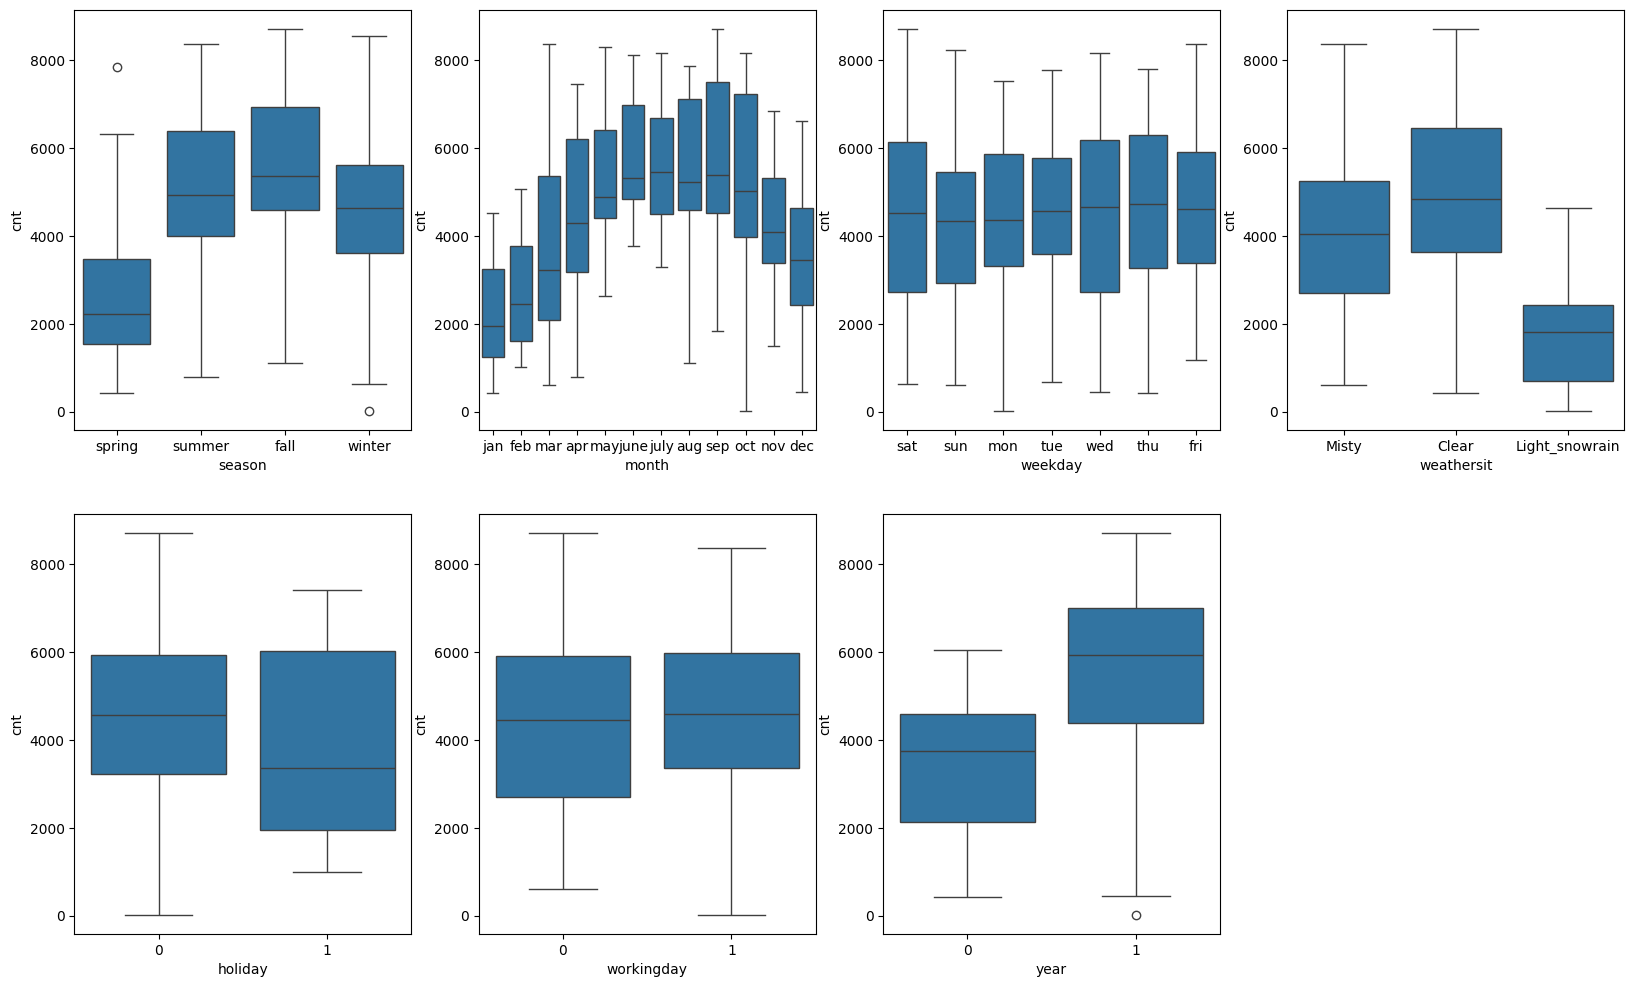

In [22]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [23]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column, y='cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(x=column, y='cnt',data=df, hue='year',palette='coolwarm')
    plt.legend(labels=['2018', '2019'])
    plt.show()

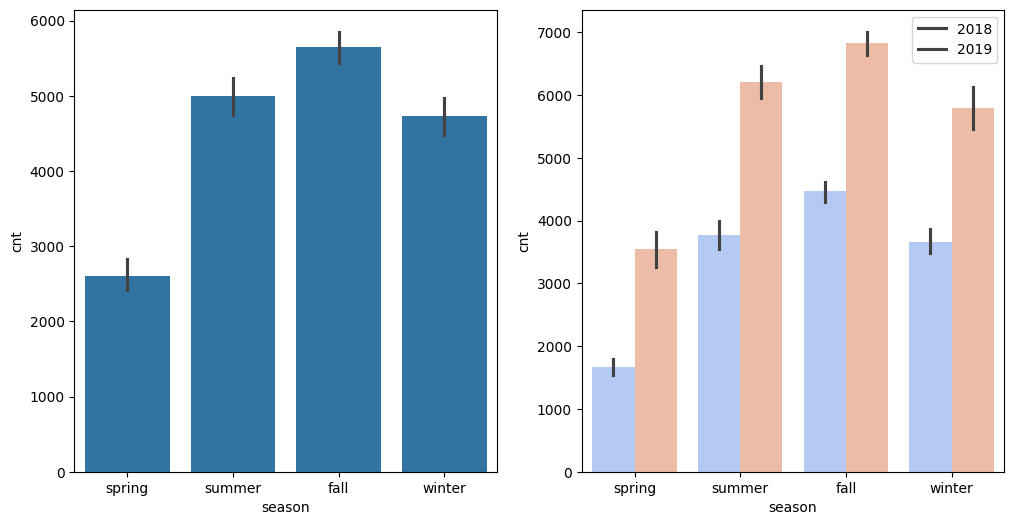

In [24]:
# plotting visualization for season column

plot_cat_columns('season')

The fall season appears to have the highest number of bookings. Additionally, there has been a significant increase in booking counts across all seasons from 2018 to 2019.

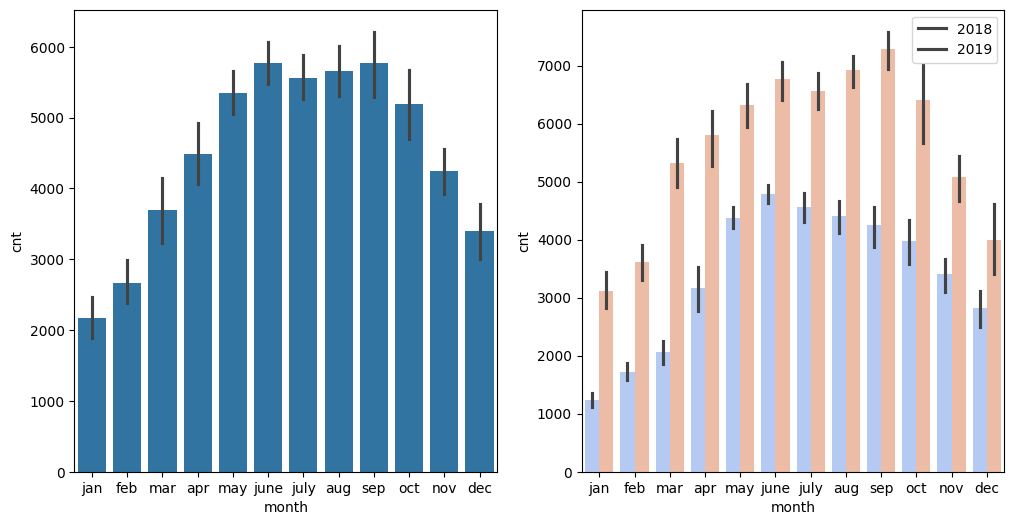

In [25]:
# plotting visualization for month column

plot_cat_columns('month')

The majority of bookings occurred during the months of May, June, July, August, September, and October. The trend shows an increase in bookings from the start of the year through the middle of the year, followed by a decline towards the end of the year. Additionally, the number of bookings per month has risen from 2018 to 2019.

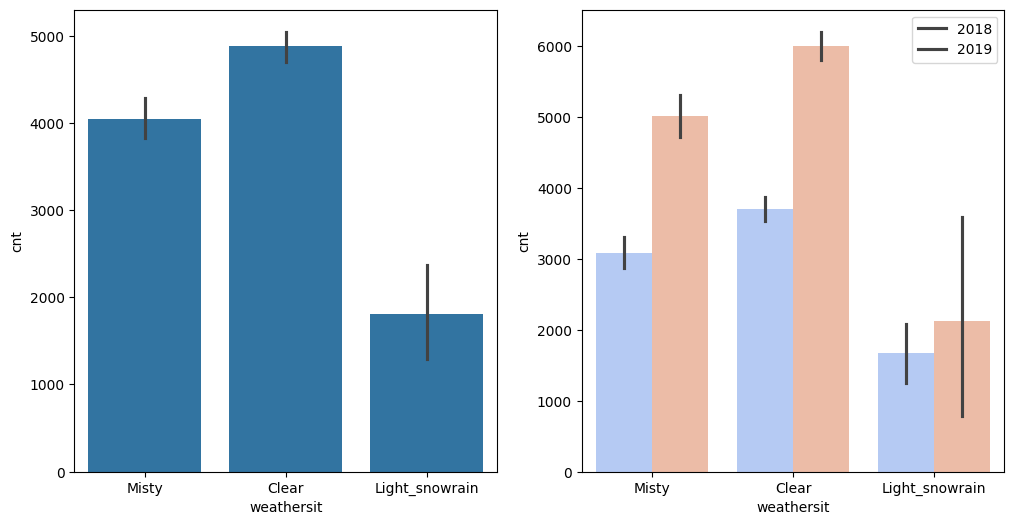

In [26]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

##Relationship between weather situation, humidity, and counts

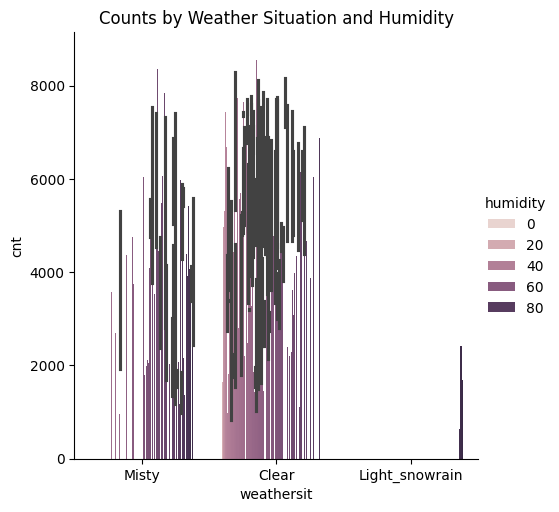

In [27]:
sns.catplot(x='weathersit', y='cnt', hue='humidity', kind='bar', data=df)
plt.title('Counts by Weather Situation and Humidity')
plt.show()

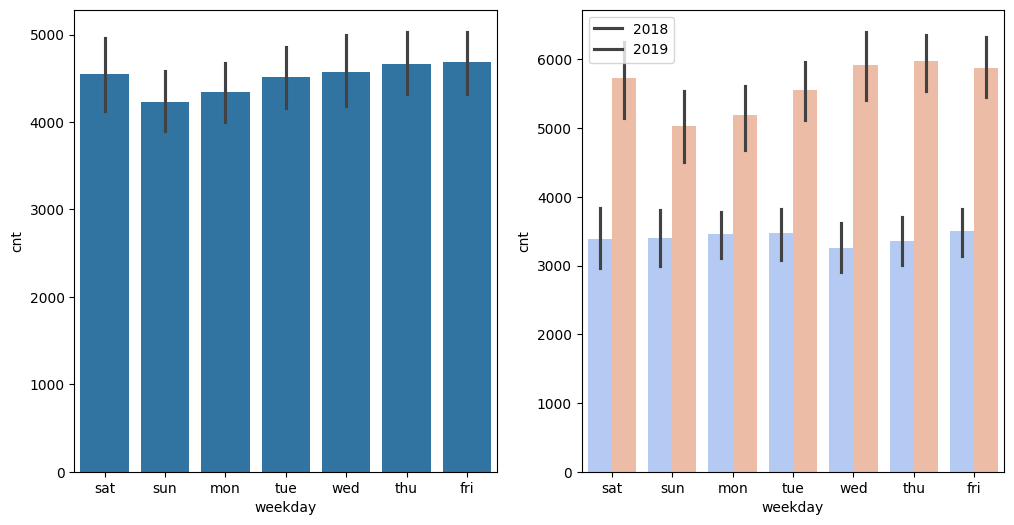

In [28]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

Bookings are higher on Thursday, Friday, Saturday, and Sunday compared to the beginning of the week.

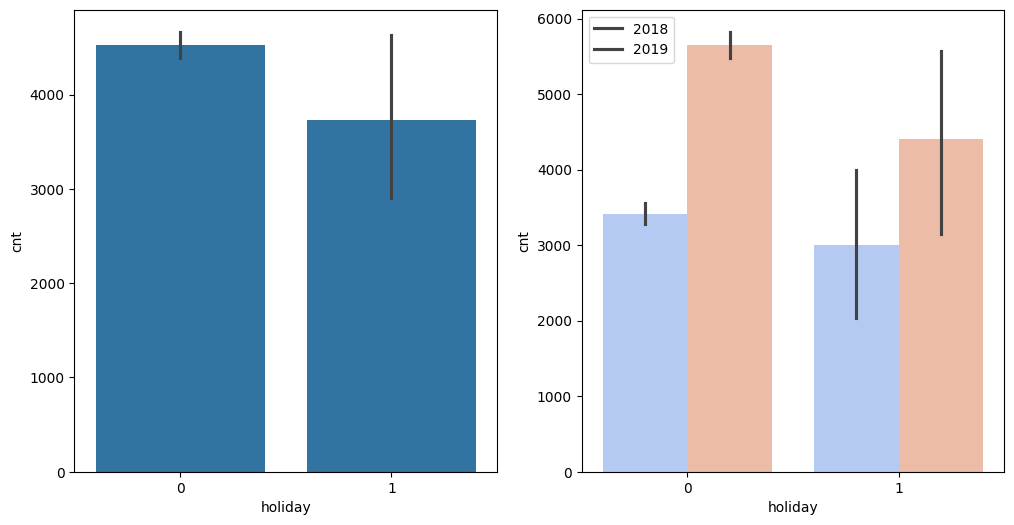

In [29]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

Bookings are generally lower on non-holiday days, which is reasonable, as people tend to stay at home and spend time with family during holidays.

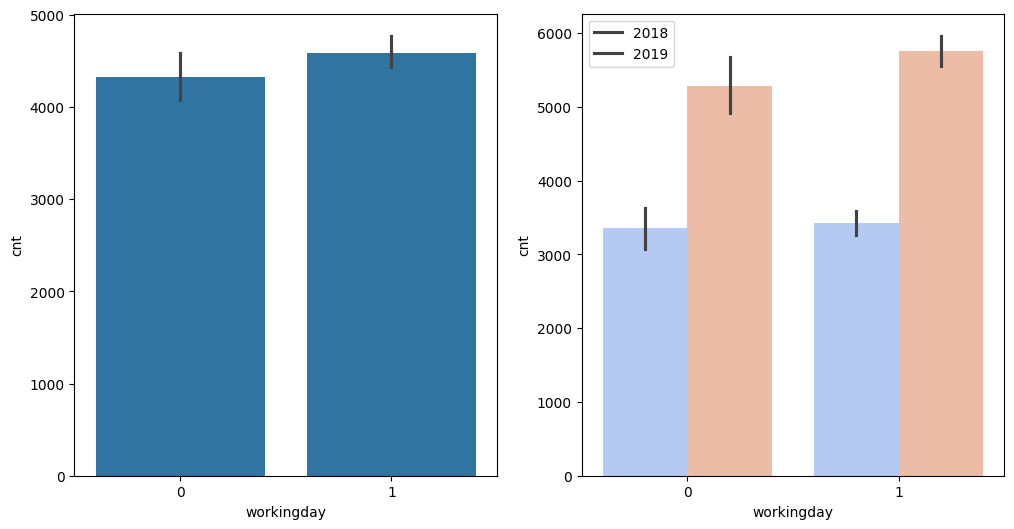

In [30]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Bookings were nearly the same on both working and non-working days. However, the booking count increased from 2018 to 2019.

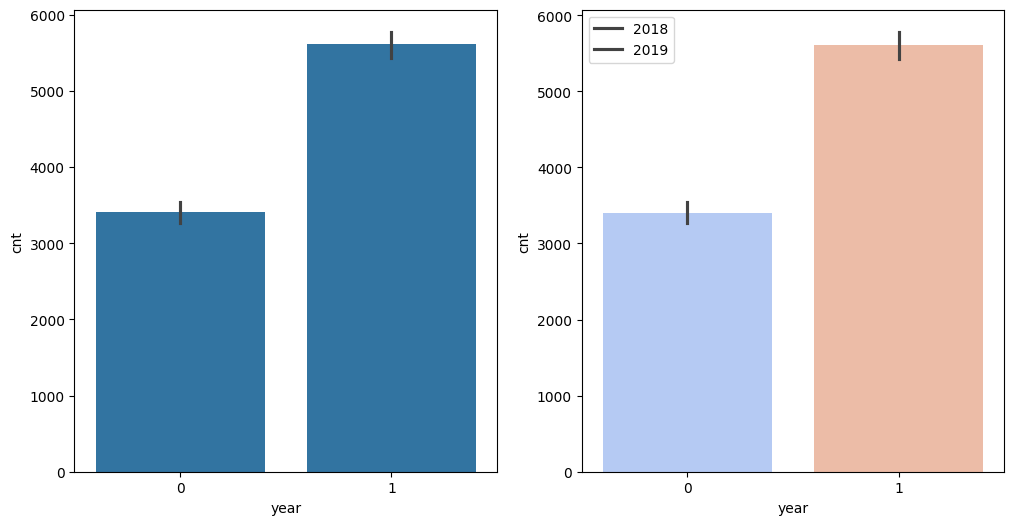

In [31]:
# plotting visualization for year column

plot_cat_columns('year')

The year 2019 saw a significant increase in bookings compared to the previous year, indicating positive growth and progress for the business.

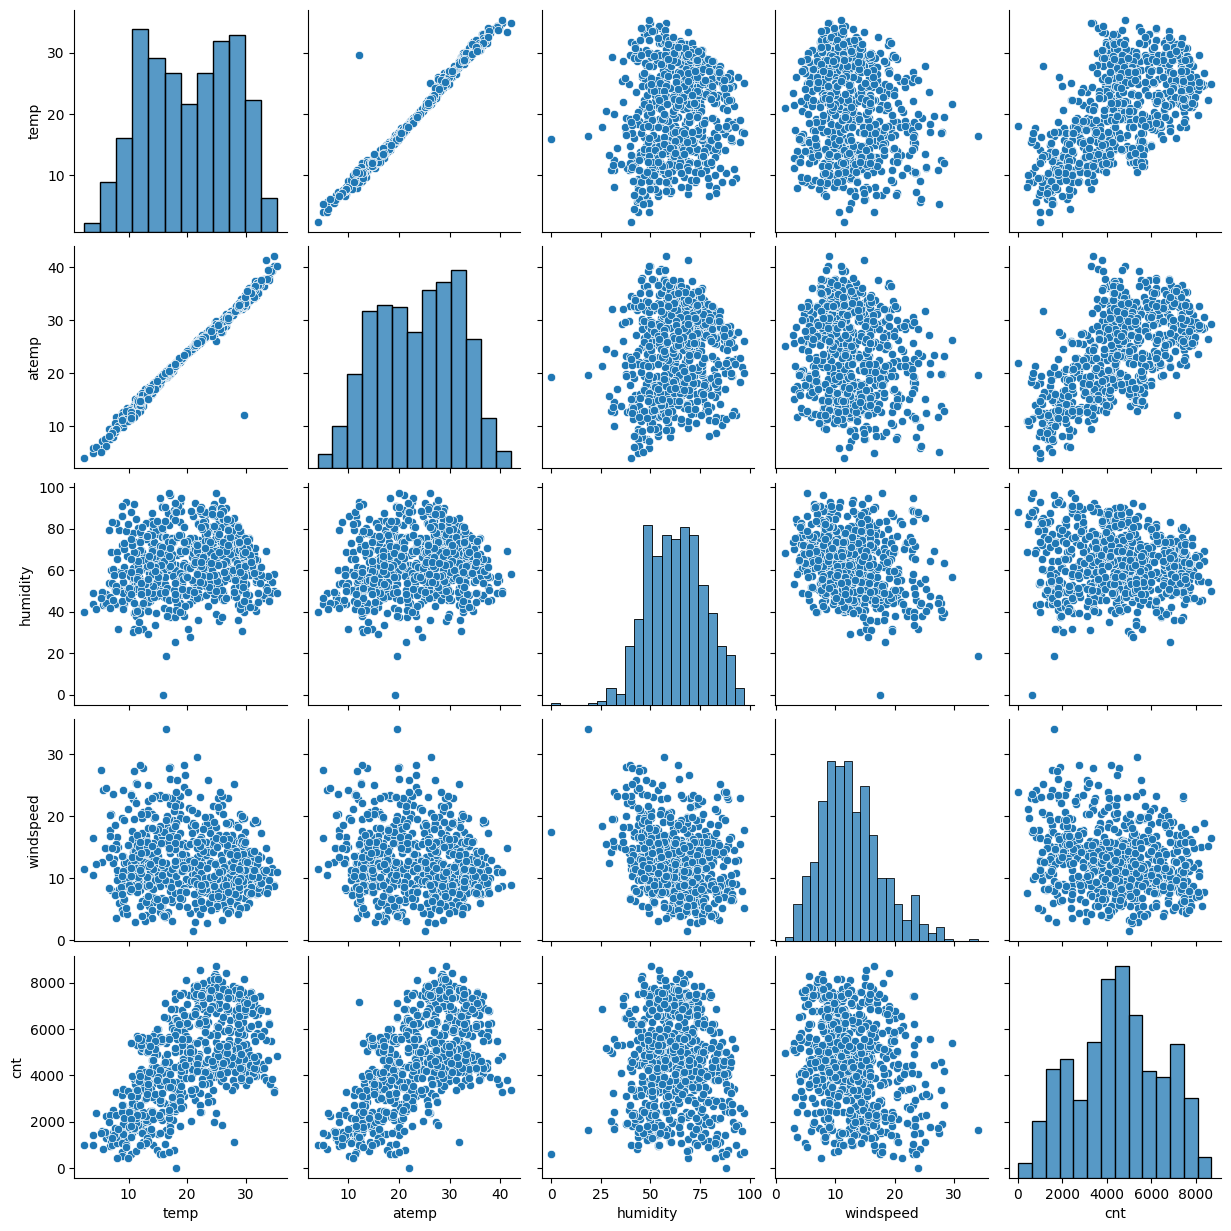

In [32]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

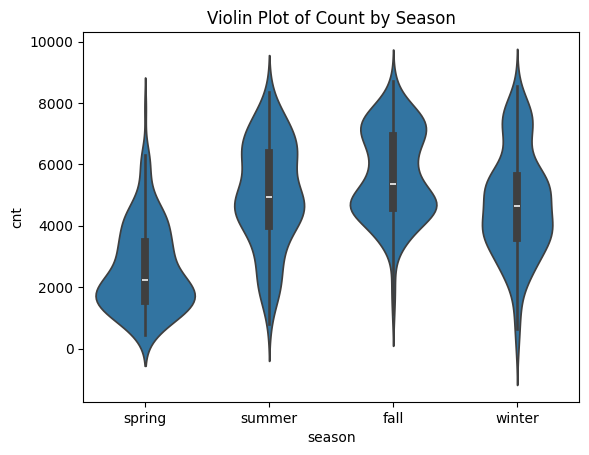

In [33]:
sns.violinplot(x='season', y='cnt', data=df)
plt.title('Violin Plot of Count by Season')
plt.show()


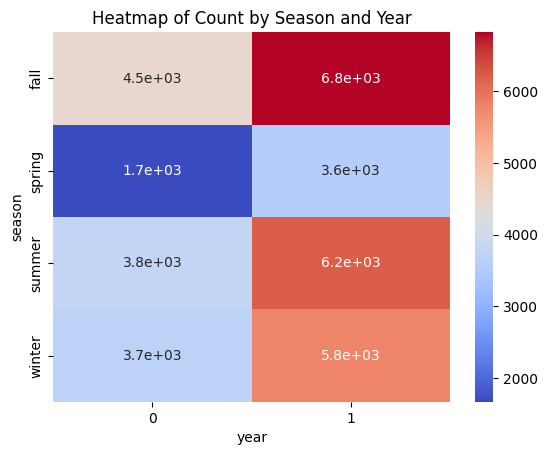

In [34]:
pivot_table = df.pivot_table(values='cnt', index='season', columns='year', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Count by Season and Year')
plt.show()


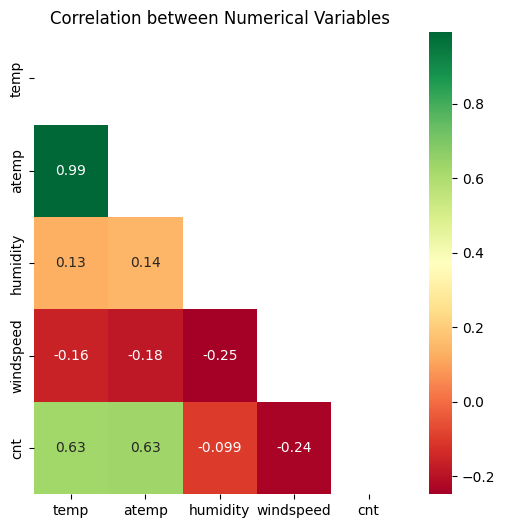

In [35]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

#### There is a linear relationship between "temp" and "atemp," indicating multicollinearity between these two variables. Due to this, both parameters cannot be used in the model. We will determine which variables to retain based on their Variance Inflation Factor (VIF) and p-values in relation to other variables.

## **Data Preparation**

In [36]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [37]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
# Merging  the dataframe, with the dummy variable dataset.

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [39]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

## **Dropping unnecessary columns since dummy variables have already been created from them.**

In [41]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [42]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


##**Inspecting the shape of the new DataFrame to verify the number of rows and columns after any transformations.**

In [43]:
df_new.shape

(730, 30)

In [44]:
# check the column info of new dataframe

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

##**Splitting the Data into Training and Testing Sets**

1. Splitting the data into training and test sets is essential for assessing a model's performance and ensuring it can generalize well to unseen data.

2. It helps prevent overfitting by using a separate test dataset, providing a more realistic estimate of the model's effectiveness. This split also enables the calculation of performance metrics, aids in model selection, and allows for hyperparameter tuning.

3. Furthermore, it prevents data leakage, ensuring that the model’s training process doesn't access any information from the test set, thus enhancing the model's reliability and robustness in real-world situations.

In [45]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [46]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [47]:
# check the shape of testing datatset

df_test.shape

(220, 30)

##**Scaling the data**
1. We will use `MinMaxScaler()` to normalize features. This process improves model performance by ensuring all features contribute equally, preventing those with larger ranges from dominating the model.

2. Normalization also aids in faster convergence during optimization and enhances the interpretability of regression coefficients, as changes in input features become proportional to changes in the output.

In [48]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [49]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,False,False,...,False,False,False,False,False,False,True,False,True,False


In [50]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [51]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,False,False,...,False,False,False,False,False,False,True,False,True,False


In [52]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Inspecting the correlation coefficients to identify which variables have a high correlation with each other.

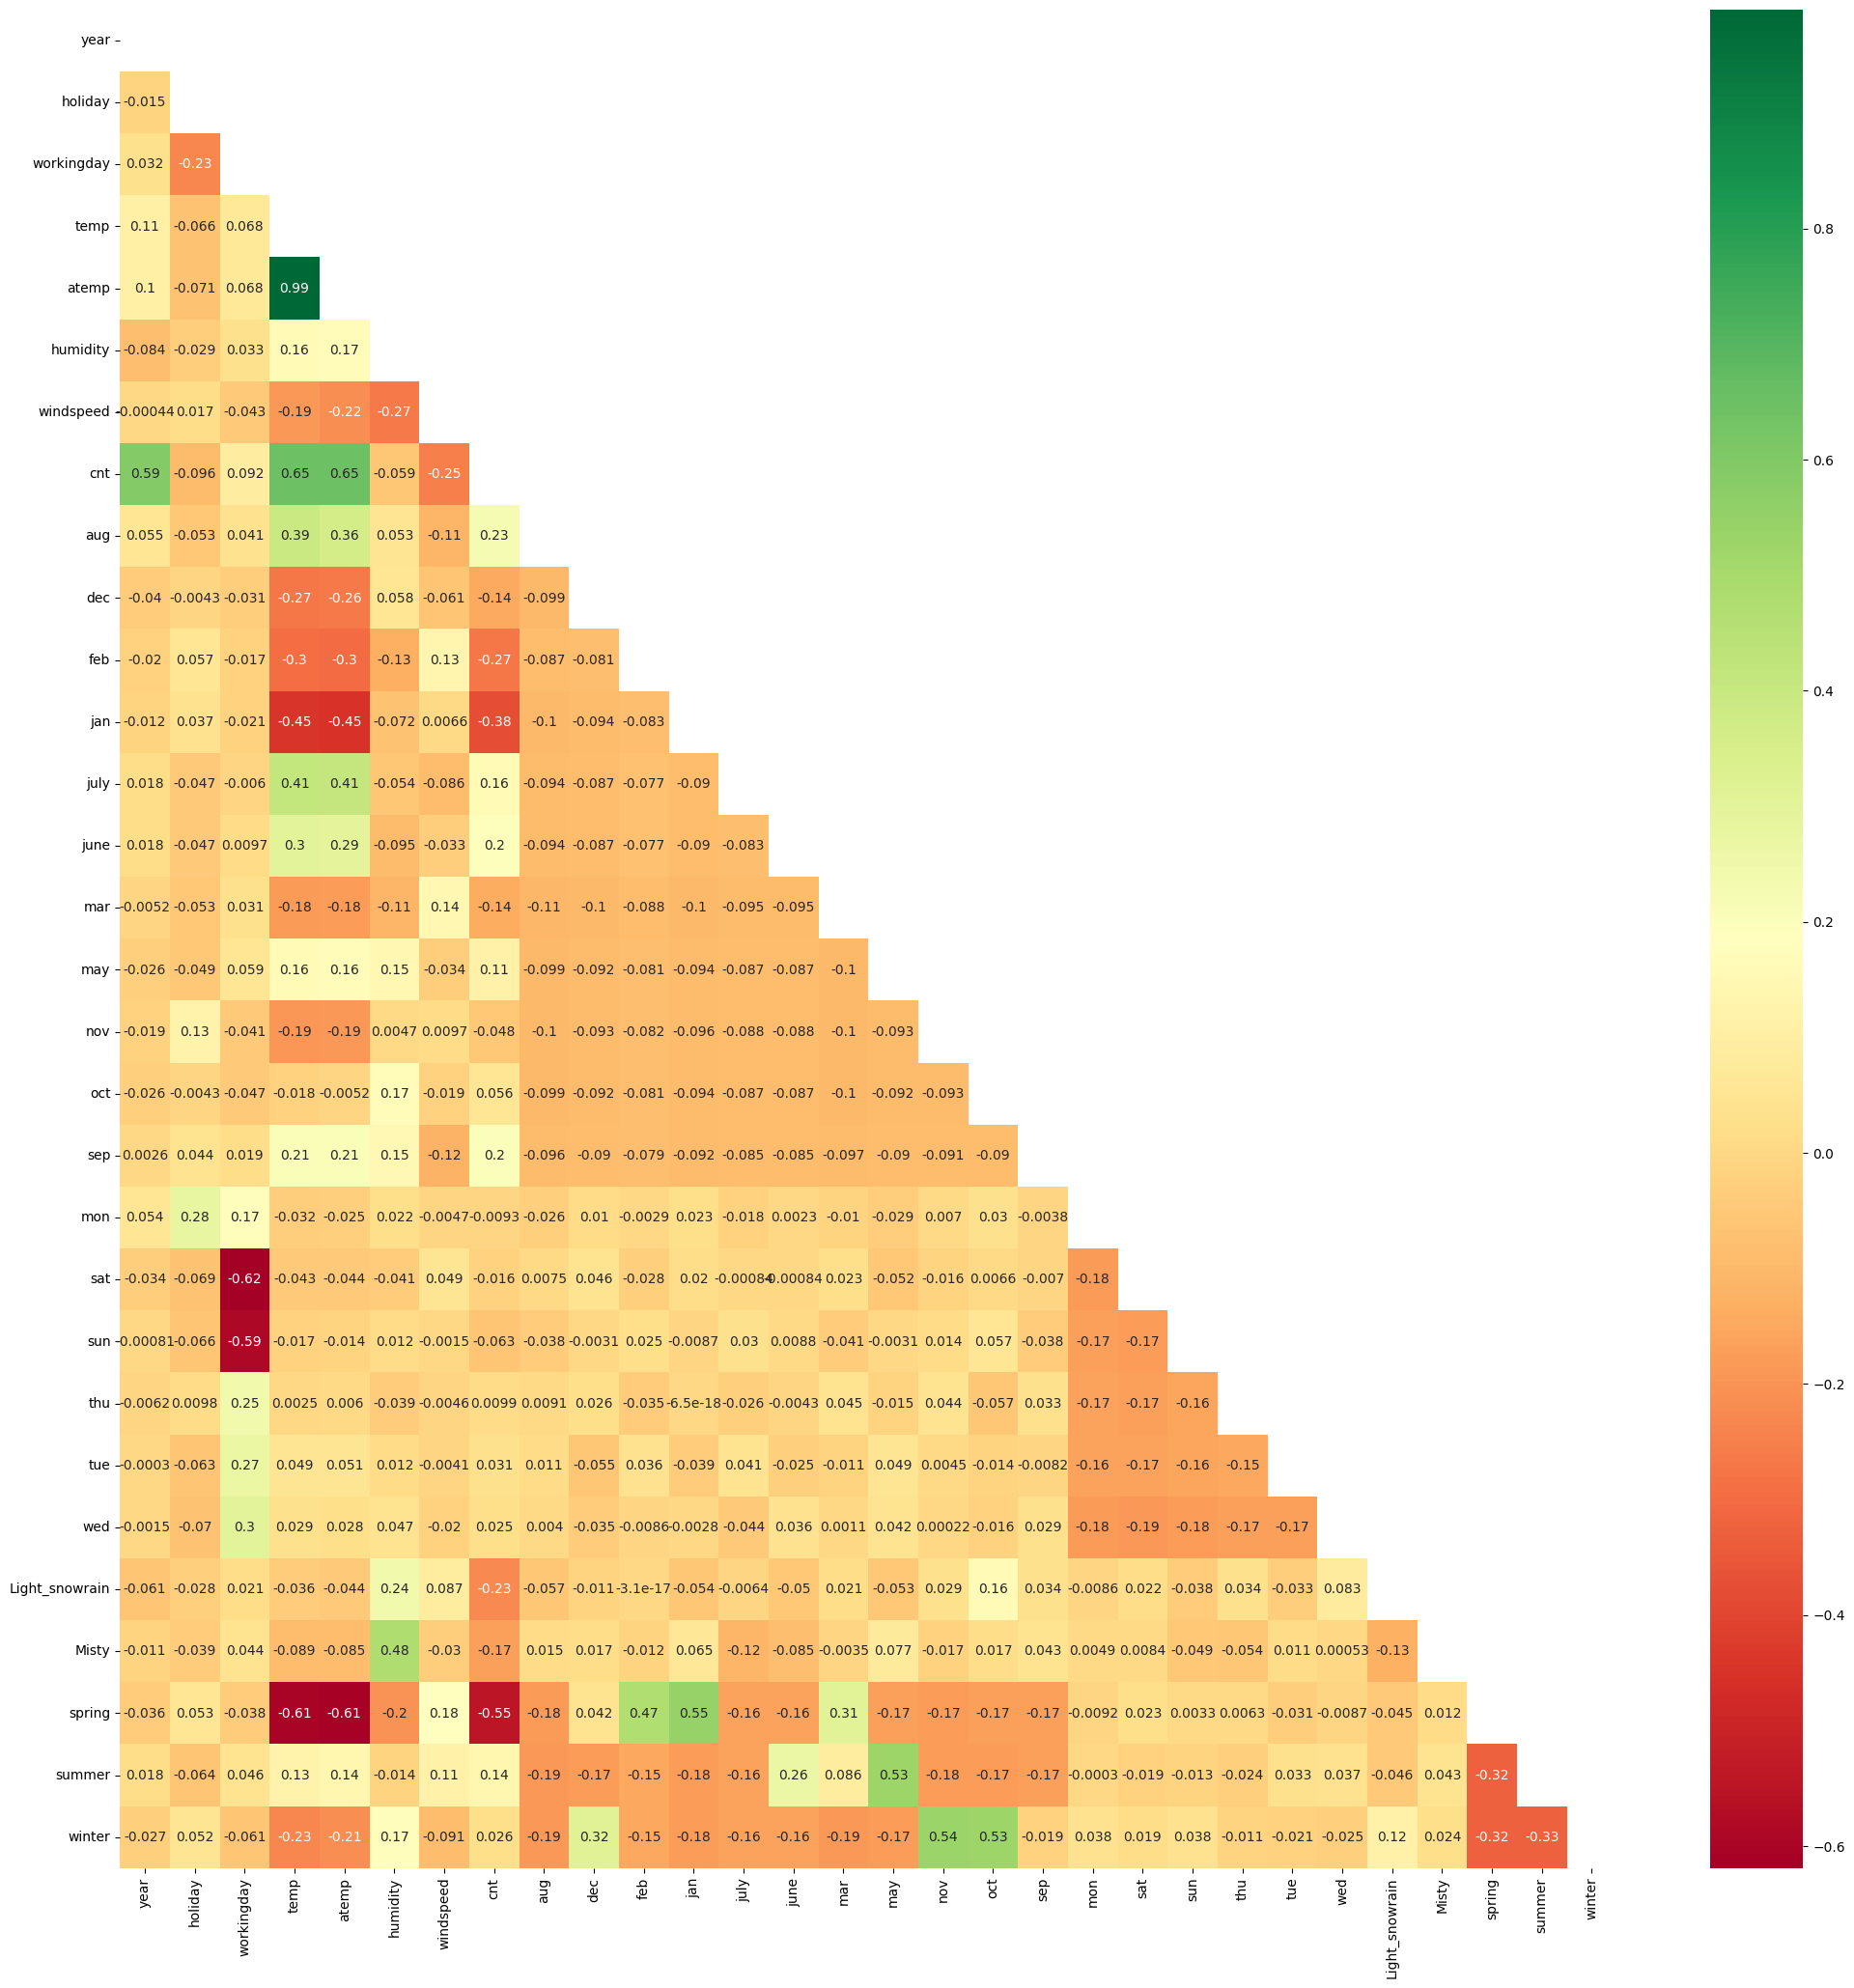

In [53]:
plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

#### The "cnt" variable appears to be correlated with both the "year" and "temp" variables. Additionally, "Misty" and "humidity" exhibit a correlation. Seasonal correlations show that the Spring season is closely associated with January and February, the Summer season with May, and the Winter season with October and November.

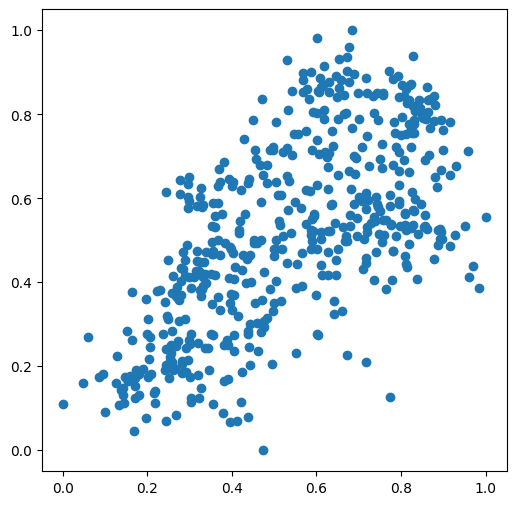

In [54]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Visualization confirms a positive correlation between "temp" and "cnt"

In [55]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [56]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [57]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [58]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [59]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [60]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [61]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [62]:
# Ensure all columns in X_train_rfe are numeric
X_train_rfe = X_train_rfe.astype(float)

In [63]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sat,1.98


humidity shows high VIF value.

## Step 5: Building a linear model

In [64]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.22e-191
Time:                        17:12:55   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

#**Observation:**

The model's performance is strong, with an R-squared of 0.848, indicating that 84.8% of the variability in the dependent variable (cnt) is explained by the model, and an adjusted R-squared of 0.844, which accounts for the number of predictors.

Significant predictors include year, positively correlated with cnt (coef = 0.2305, p < 0.000), indicating an increase over time. Holiday negatively correlates with cnt (coef = -0.0582, p < 0.031), suggesting lower counts on holidays, while workingday shows a positive correlation (coef = 0.0433, p < 0.000), indicating higher counts on working days.


Temperature has a strong positive effect (coef = 0.5096, p < 0.000), whereas humidity (coef = -0.1563, p < 0.000) and windspeed (coef = -0.1863, p < 0.000) have negative impacts.

Seasonal effects show that spring has a negative effect (coef = -0.0509, p < 0.014), while summer (coef = 0.0508, p < 0.001) and winter (coef = 0.0933, p < 0.000) have positive effects.


Weather conditions such as light snow/rain (coef = -0.2475, p < 0.000) and misty (coef = -0.0563, p < 0.000) significantly negatively impact cnt.


In [65]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


VIF values seems to be good now. But we will see if we can reduce further.

In [66]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.60e-188
Time:                        17:13:05   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [67]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [68]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.60e-188
Time:                        17:13:13   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [69]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.60e-188
Time:                        17:13:16   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [70]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.34
0,year,2.07
12,winter,1.98
7,sat,1.96
5,july,1.58
9,Misty,1.57


In [71]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.28e-188
Time:                        17:13:24   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1576      0.031      5.

In [72]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,5.70
2,workingday,5.20
4,windspeed,4.65
9,spring,2.40
0,year,2.07
10,summer,2.01
6,sat,1.96
11,winter,1.83
8,Misty,1.57
5,sep,1.24


VIF value now seems to be good as it came below 5.

In [73]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          3.16e-188
Time:                        17:13:33   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1484      0.031      4.

#### We can consider the model `lr_6`, as it demonstrates very low multicollinearity between the predictors, and the p-values for all the predictors appear to be significant.

#### The F-statistic value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 (almost equal to zero) indicate that the overall model is statistically significant.

In [74]:
# Checking the parameters and their coefficient values
lr_6.params

,0
const,0.148415
year,0.234246
holiday,-0.054694
workingday,0.047383
temp,0.478866
windspeed,-0.149169
sep,0.089387
sat,0.058501
Light_snowrain,-0.290429
Misty,-0.080854


## Step 6: Residual Analysis of the train data and validation

In [75]:
X_train_lm_6

,const,year,holiday,workingday,temp,windspeed,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1.0,1.0,0.0,1.0,0.815169,0.264686,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,1.0,0.0,0.0,0.442393,0.255342,0.0,1.0,0.0,1.0,1.0,0.0,0.0
728,1.0,1.0,0.0,0.0,0.245101,0.663106,0.0,0.0,0.0,0.0,1.0,0.0,0.0
482,1.0,1.0,0.0,0.0,0.395666,0.188475,0.0,1.0,0.0,1.0,0.0,1.0,0.0
111,1.0,0.0,0.0,1.0,0.345824,0.380981,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1.0,0.0,1.0,0.863973,0.187140,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,1.0,0.0,0.0,1.0,0.202618,0.111379,0.0,0.0,0.0,0.0,1.0,0.0,0.0
350,1.0,0.0,0.0,0.0,0.248216,0.431816,0.0,1.0,0.0,1.0,0.0,0.0,1.0
79,1.0,0.0,0.0,1.0,0.462664,0.529881,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [76]:
y_train_pred = lr_6.predict(X_train_lm_6)

##Normality of error terms

The normality of error terms in linear regression is essential for valid confidence intervals, reliable hypothesis testing, and accurate model diagnostics. It ensures that the model performs better, provides more accurate predictions, and adheres to key assumptions, ultimately improving the model's generalizability and validity..


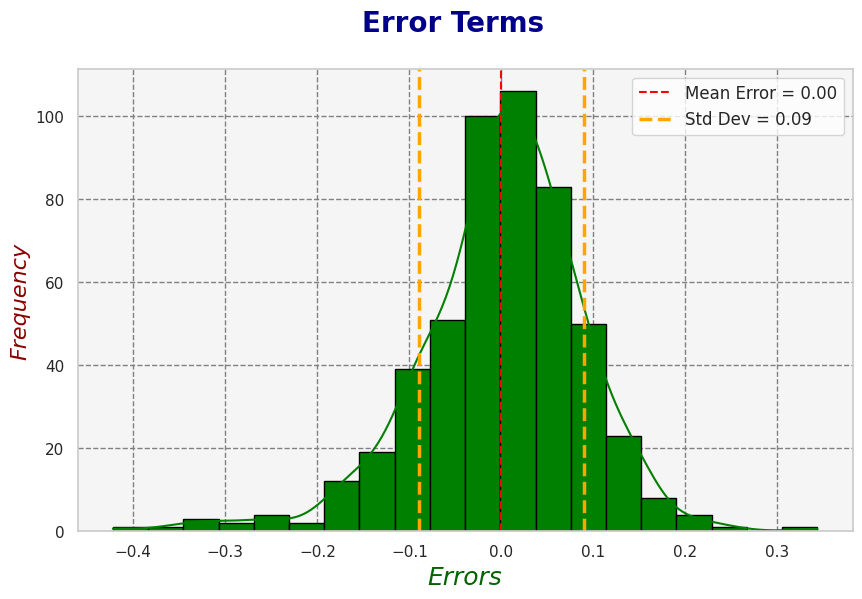

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

fig = plt.figure(figsize=(10, 6))
sns.histplot((y_train - y_train_pred), bins=20, kde=True, color='green', edgecolor='black', alpha=1)
fig.suptitle('Error Terms', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Errors', fontsize=18, fontstyle='italic', color='darkgreen')
plt.ylabel('Frequency', fontsize=16, fontstyle='italic', color='darkred')

# Adding grid lines and custom background
plt.grid(True, linestyle='--', linewidth=1, color='gray')
plt.gca().set_facecolor('whitesmoke')

# Adding annotations for mean and standard deviation
mean_error = (y_train - y_train_pred).mean()
std_error = (y_train - y_train_pred).std()
plt.axvline(mean_error, color='red', linestyle='--', linewidth=1.5, label=f'Mean Error = {mean_error:.2f}')
plt.axvline(mean_error + std_error, color='orange', linestyle='--', linewidth=2.5, label=f'Std Dev = {std_error:.2f}')
plt.axvline(mean_error - std_error, color='orange', linestyle='--', linewidth=2.5)

# Adding legend
plt.legend(loc='upper right', fontsize=12)

plt.show()


Error terms are following normal distribution

#### Multi Colinearity

In [78]:
calculateVIF(X_train_new)

,Features,VIF
3,temp,5.70
2,workingday,5.20
4,windspeed,4.65
9,spring,2.40
0,year,2.07
10,summer,2.01
6,sat,1.96
11,winter,1.83
8,Misty,1.57
5,sep,1.24


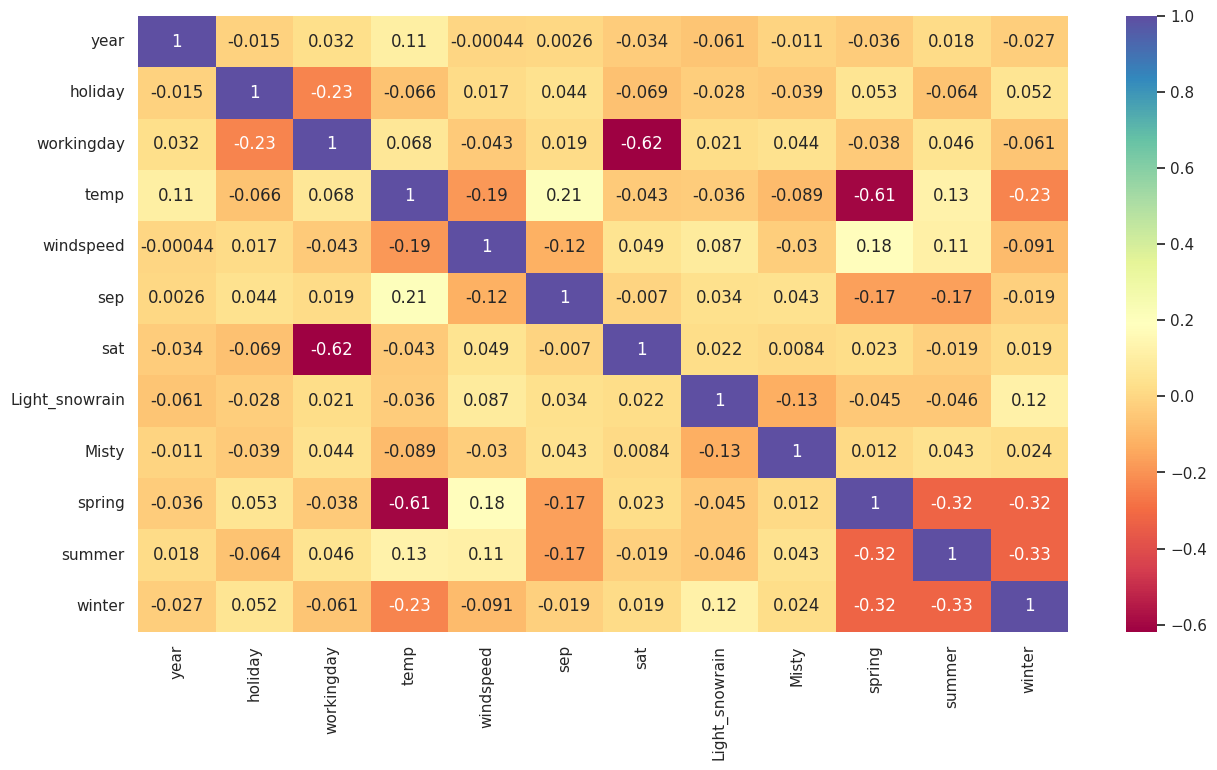

In [79]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap='Spectral')
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### Linearity

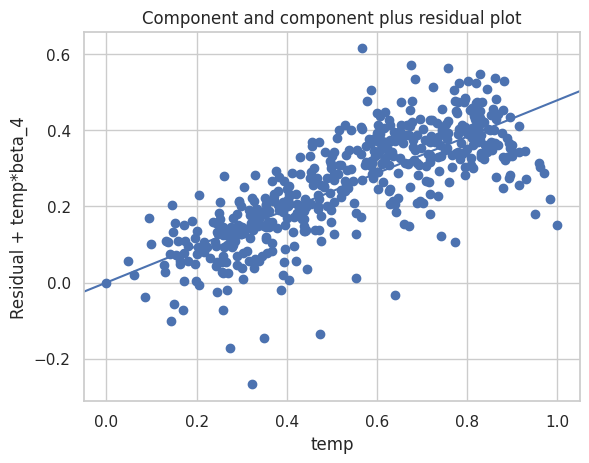

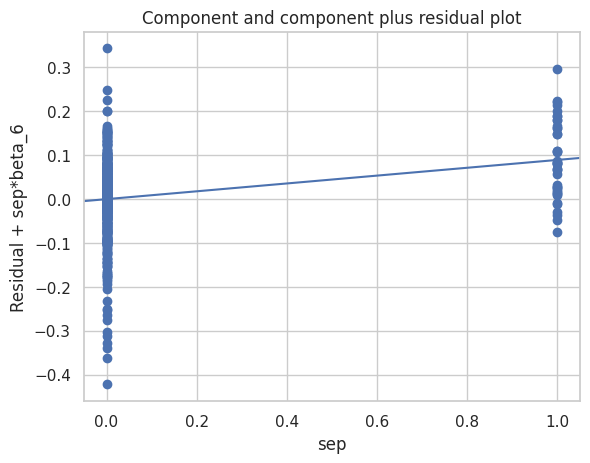

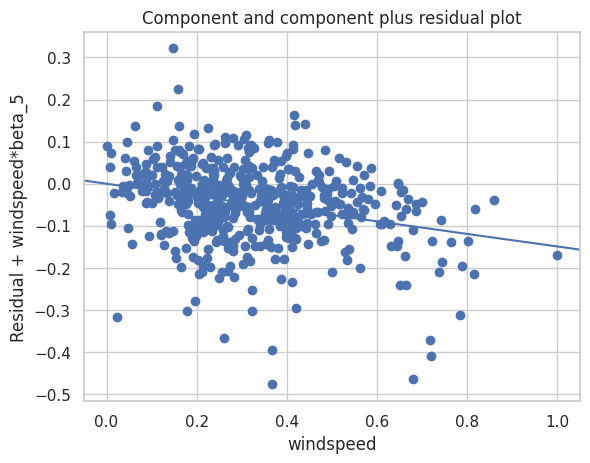

In [80]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

#### Homoscedasticity

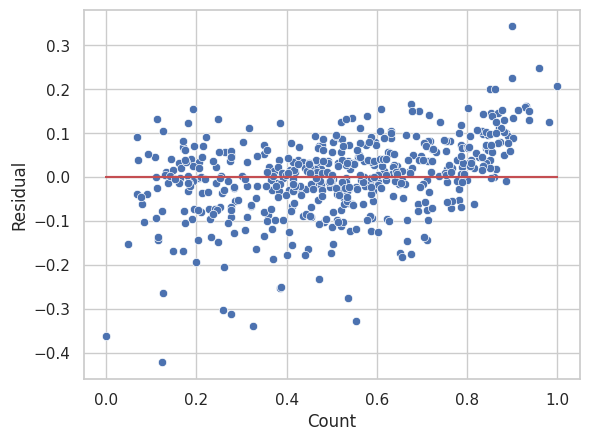

In [81]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

#### Independence of residuals

Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [82]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,False,False,True,False,False,False,True,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,True,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,False,False,True,False,False,False,False,False,True,False


In [83]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [84]:
y_test = df_test.pop('cnt')
X_test = df_test

In [85]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [86]:
y_pred = lr_6.predict(X_test_lm_6)

In [87]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8068

#**Rounding off the parameters of depedent variables upto four decimal places**

In [90]:
round(lr_6.params,4)

,0
const,0.1484
year,0.2342
holiday,-0.0547
workingday,0.0474
temp,0.4789
windspeed,-0.1492
sep,0.0894
sat,0.0585
Light_snowrain,-0.2904
Misty,-0.0809


#**We can see that the equation of our best fitted line is:**

##$$ cnt = 0.1484 + 0.2342 \times year - 0.0547 \times holiday + 0.0474 \times workingday + 0.4789 \times temp - 0.1492 \times windspeed + 0.0894 \times sep + 0.0585 \times sat - 0.2904 \times Light\_snowrain - 0.0809 \times Misty - 0.0543 \times spring + 0.0625 \times summer + 0.0968 \times winter $$

#**Observation**

This equation represents the relationship between the dependent variable (cnt) and the independent variables (predictors) in your model. Each term in the equation is a coefficient multiplied by its corresponding predictor, indicating the impact of that predictor on cnt.

**Intercept (0.1484): This is the base value of cnt when  all other predictors are zero. It represents the starting point of the model.**

The adjusted R-squared value holds significant importance as it provides a more precise measure of a model's goodness-of-fit, especially within the context of multiple predictors.

In [91]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7956


The adjusted R-squared value is crucial because it offers a more accurate measure of a model's goodness-of-fit, especially when dealing with multiple predictors.

Unlike the standard R-squared, which simply measures the proportion of variance explained by the model, the adjusted R-squared penalizes the inclusion of irrelevant predictors that do not meaningfully improve the model's performance.

##**Visualising the regression plot for its linearity **

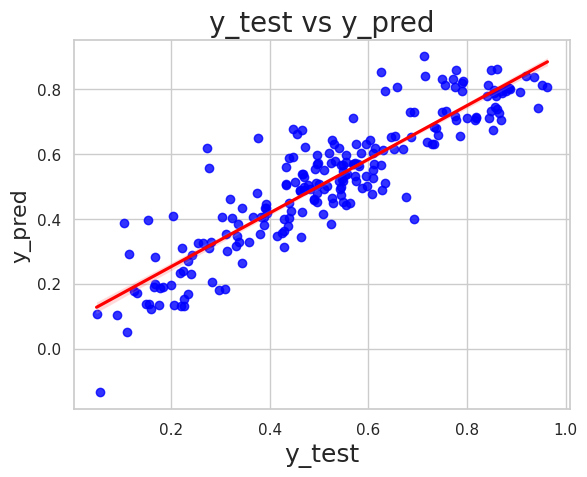

In [92]:
plt.figure()
y_test = y_test.astype(float)
y_pred = y_pred.astype(float)
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#**Observation:**

1. When the predicted model of linear regression yields a linear graph, it signifies a linear relationship between the dependent and independent variables. This suggests that changes in the predictor variables result in proportional changes in the response variable.

2. A linear graph indicates the model's adherence to linearity, validating the assumption that the relationship can be accurately represented by a linear equation. It implies that the predictors collectively contribute to a direct, scalar transformation of the dependent variable, demonstrating the model's effectiveness in capturing the underlying linear trends in the data.

# **Comparision between Training and Testing dataset:**
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.8038
    - Train dataset Adjusted R^2 : 0.829    
    - Test dataset Adjusted R^2  : 0.7944

##**Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.**

#**Final Observations**

Certainly! Let's break down the linear regression parameters and their implications:

- **const (0.1484)**:  
  The intercept of the regression line. It represents the baseline value of `cnt` when all other predictors are zero.

- **year (0.2342)**:  
  A positive coefficient indicates that `cnt` increases by approximately 0.2342 units for each additional year. This suggests a general upward trend in bike rentals over time.

- **holiday (-0.0547)**:  
  A negative coefficient suggests that on holidays, `cnt` decreases by about 0.0547 units, reflecting a decrease in bike rentals during holidays.

- **workingday (0.0474)**:  
  A positive coefficient means that on working days, `cnt` increases by approximately 0.0474 units, indicating higher bike rental counts on weekdays.

- **temp (0.4789)**:  
  A strong positive coefficient, showing that higher temperatures significantly increase `cnt` by around 0.4789 units. This suggests that warmer weather leads to more bike rentals.

- **windspeed (-0.1492)**:  
  A negative coefficient indicates that higher wind speeds reduce `cnt` by about 0.1492 units, likely due to less outdoor activity in windy conditions.

- **sep (0.0894)**:  
  A positive coefficient suggests that in September, `cnt` increases by approximately 0.0894 units, indicating higher rental counts in this month.

- **sat (0.0585)**:  
  A positive coefficient shows that on Saturdays, `cnt` increases by around 0.0585 units, indicating higher rental counts on weekends.

- **Light_snowrain (-0.2904)**:  
  A significant negative coefficient, indicating that light snow or rain conditions reduce `cnt` by approximately 0.2904 units. This reflects the adverse effects of poor weather conditions on bike rentals.

- **Misty (-0.0809)**:  
  A negative coefficient means that misty conditions decrease `cnt` by about 0.0809 units, suggesting lower bike rentals in misty weather.

- **spring (-0.0543)**:  
  A negative coefficient suggests that during spring, `cnt` is lower by approximately 0.0543 units, possibly indicating less activity during this season.

- **summer (0.0625)**:  
  A positive coefficient means that in summer, `cnt` increases by about 0.0625 units, showing a rise in bike rentals during the warmer months.

- **winter (0.0968)**:  
  A positive coefficient indicates that during winter, `cnt` increases by approximately 0.0968 units, suggesting higher bike rentals even in the colder months.

These coefficients indicate how each variable influences the bike rental count (`cnt`) and provide insight into the factors that impact demand for shared bikes across different conditions.



